# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Priyanka Gorentla

https://github.com/gpriyankav/web-scraping

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [13]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                       Version
----------------------------- --------------------
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
asgiref                       3.5.2
asteval                       0.9.31
astroid                       2.11.7
astropy                       5.1
async-lru                     2.0.4
atomicwrites                  1.4.0
attrs                         23.1.0
Automat                       20.2.0
autopep8                      2.0.2
Babel                         2.12.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1


Q1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [15]:
import requests
import pickle

url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

try:
    response = requests.get(url)
    if response.status_code == 200:
        blog_html = response.text
        soup = BeautifulSoup(blog_html, "html.parser")
        article = soup.find("article")

        with open("blog.pkl", "wb") as f:
            pickle.dump(str(article), f)
        print("Article HTML has been successfully extracted and saved to 'blog.pkl'.")
    else:
        print("Failed to fetch the content. Status code:", response.status_code)
except requests.exceptions.RequestException as e:
    print("Error:", e)

Article HTML has been successfully extracted and saved to 'blog.pkl'.


Q2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [16]:
import pickle
from bs4 import BeautifulSoup

try:
    with open("blog.pkl", "rb") as f:
        blog_html = pickle.load(f)
        
    soup = BeautifulSoup(blog_html, "html.parser")
    blog_text = soup.get_text()
    
    print(blog_text)
except FileNotFoundError:
    print("The 'blog.pkl' file was not found.")
except Exception as e:
    print("Error:", e)




How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

Q3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [17]:
import pickle
import spacy
# Load the article text from the file
try:
    with open("blog.pkl", "rb") as f:
        blog_html = pickle.load(f)
except FileNotFoundError:
    print("The 'blog.pkl' file was not found.")
    exit()

# Load the English spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Process the article text with spaCy
doc = nlp(blog_text)

# Function to filter out unwanted tokens
def is_token_valid(token):
    return not (token.is_stop or token.is_space or token.is_punct)

# Filter and convert tokens to lowercase
filtered_tokens = [token.text.lower() for token in doc if is_token_valid(token)]

# Calculate token frequencies
token_freq = Counter(filtered_tokens)

# Get the 5 most frequent tokens
most_common_tokens = token_freq.most_common(5)

# Print the common tokens with their frequencies
print("5 Most Frequent Tokens:")
for token, frequency in most_common_tokens:
    print(f"{token}: {frequency} occurrences")

# Print all tokens with their frequencies
#print("\nAll Tokens with Frequencies:")
#for token, frequency in token_freq.items():
#    print(f"{token}: {frequency} occurrences")


5 Most Frequent Tokens:
laser: 35 occurrences
headlights: 19 occurrences
headlight: 11 occurrences
technology: 10 occurrences
led: 10 occurrences


Q4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [18]:
import pickle
import spacy

# Lemmatize and convert tokens to lowercase
lemmas = [token.lemma_.lower() for token in doc if is_token_valid(token)]

# Calculate lemma frequencies
lemma_freq = Counter(lemmas)

# Get the 5 most frequent lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Print the common lemmas with their frequencies
print("5 Most Frequent Lemmas:")
for lemma, frequency in most_common_lemmas:
    print(f"{lemma}: {frequency} occurrences")

5 Most Frequent Lemmas:
laser: 40 occurrences
headlight: 28 occurrences
beam: 12 occurrences
technology: 10 occurrences
light: 10 occurrences


Q5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [19]:
def score_sentence_by_token(sentence, interesting_tokens):
    total_words = len([token for token in sentence])
    interesting_count = len([token.text.lower() for token in sentence if token.text in interesting_tokens])
    return interesting_count / total_words
sentences = list(doc.sents)
token_score = score_sentence_by_token(sentences[0], token_freq)
print(f"Score of the first sentence by frequent tokens:", token_score)

def score_sentence_by_lemma(sentence, interesting_lemmas):
    total_words = len([word for word in sentence])
    interesting_count = len([token.lemma_.lower() for token in sentence if token.lemma_ in interesting_lemmas])
    return interesting_count / total_words
sentences1 = list(doc.sents)
lemma_score = score_sentence_by_lemma(sentences1[0], lemma_freq)
print(f"Score of the first sentence by frequent lemma:", lemma_score)

Score of the first sentence by frequent tokens: 0.15
Score of the first sentence by frequent lemma: 0.15


Q6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

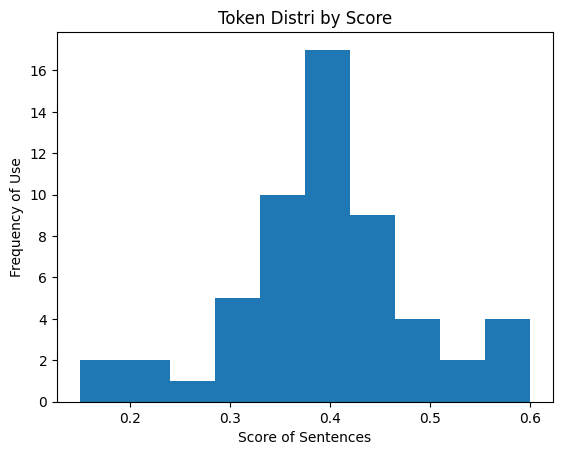

In [21]:
token_scores = []
import pickle
from bs4 import BeautifulSoup

with open("blog.pkl", "rb") as f:
        blog_html = pickle.load(f)
        
soup = BeautifulSoup(blog_html, "html.parser")
blog_text = soup.get_text()
    
# Load the English spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Process the article text with spaCy
doc = nlp(blog_text)

for sentence in list(doc.sents):
    score = score_sentence_by_token(sentence, token_freq)
    token_scores.append(score)
    
# Plot Score Distributions

plt.hist(token_scores)
plt.title('Token Distri by Score')
plt.xlabel('Score of Sentences')
plt.ylabel('Frequency of Use')
plt.show()

## The most common range by token is between 0.40 and 0.45.

Q7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Score of the first sentence by frequent tokens: 0.15


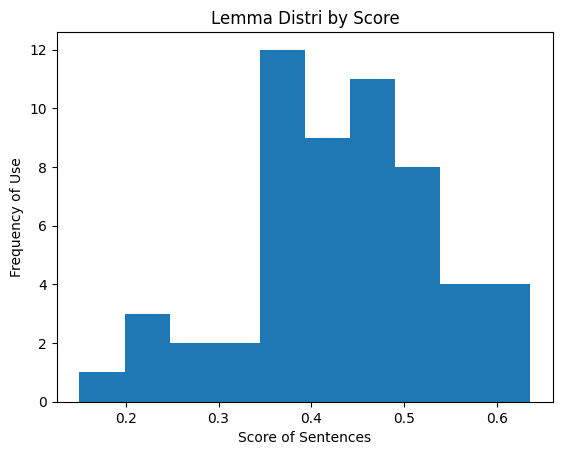

In [17]:
import pickle
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

try:
    with open("blog.pkl", "rb") as f:
        blog_html = pickle.load(f)
        
    soup = BeautifulSoup(blog_html, "html.parser")
    blog_text = soup.get_text()
except FileNotFoundError:
    print("The 'blog.pkl' file was not found.")
except Exception as e:
    print("Error:", e)
    
# Load the English spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Process the article text with spaCy
doc = nlp(blog_text)

# Function to filter out unwanted tokens
def is_token_valid(token):
    return not (token.is_stop or token.is_space or token.is_punct)

# Filter and convert tokens to lowercase
filtered_tokens = [token.text.lower() for token in doc if is_token_valid(token)]

# Calculate token frequencies
token_freq = Counter(filtered_tokens)

# Get the 5 most frequent tokens
most_common_tokens = token_freq.most_common(5)

# Lemmatize and convert tokens to lowercase
lemmas = [token.lemma_.lower() for token in doc if is_token_valid(token)]

# Calculate lemma frequencies
lemma_freq = Counter(lemmas)

# Get the 5 most frequent lemmas
most_common_lemmas = lemma_freq.most_common(5)


def score_sentence_by_token(sentence, interesting_tokens):
    total_words = len([token for token in sentence])
    interesting_count = len([token.text.lower() for token in sentence if token.text in interesting_tokens])
    return interesting_count / total_words
sentences = list(doc.sents)
token_score = score_sentence_by_token(sentences[0], token_freq)
print(f"Score of the first sentence by frequent tokens:", token_score)

def score_sentence_by_lemma(sentence, interesting_lemmas):
    total_words = len([word for word in sentence])
    interesting_count = len([token.lemma_.lower() for token in sentence if token.lemma_ in interesting_lemmas])
    return interesting_count / total_words
sentences1 = list(doc.sents)
lemma_score = score_sentence_by_lemma(sentences1[0], lemma_freq)

# Calculate lemma frequencies
lemma_freq = Counter(lemmas)
sentences1 = list(doc.sents)
lemma_score = score_sentence_by_lemma(sentences1[0], lemma_freq)

# Lemmatize and convert tokens to lowercase
lemmas = [token.lemma_.lower() for token in doc if is_token_valid(token)]

lemma_scores = []
for sentence in list(doc.sents):
    score = score_sentence_by_lemma(sentence, lemma_freq)
    lemma_scores.append(score)
    
# Plot Score Distributions

plt.hist(lemma_scores)
plt.title('Lemma Distri by Score')
plt.xlabel('Score of Sentences')
plt.ylabel('Frequency of Use')
plt.show()

# Common distribution of for our lemmas lie between .35 and 0.4

Q8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

In [ ]:
from collections import Counter
import pickle
from bs4 import BeautifulSoup

def is_token_valid_new(token):
    nouns = ['NOUN', 'PRON', 'PROPN']
    return not (token.is_punct or token.is_space or token.pos_ != nouns)

# Filter out unwanted tokens and lemmatize the valid tokens
tokens = [token.text.lower() for token in doc if is_token_valid_new(token)]

# Calculate the most frequent tokens
most_common_tokens = Counter(tokens).most_common(5)
print("Interesting tokens:")
for token, count in most_common_tokens:
    print(f'{token} {count}')


In [ ]:
Interesting tokens:
Laser  35
headlights 19
technology 10
headlight 9
beam 7

In [ ]:
from collections import Counter
import pickle
from bs4 import BeautifulSoup

# Filter out unwanted tokens and lemmatize the valid tokens
good_lemmas = [token.lemma_.lower() for token in doc if is_token_valid_new(token)]

# Calculate the most frequent tokens
most_common_lemmas = Counter(good_lemmas).most_common(5)
print("Interesting lemmas:")
for token, count in most_common_lemmas:
    print(f'{token} {count}')

In [ ]:
Interesting lemmas:
laser 40
headlight 26
beam 12
technology 10
led 7

Tokens that aren't nouns should be eliminated from the most common tokens count. In order to answer question 4, we need to exclude noun lemmas from the most frequent lemma count. The is_token_valid_new function allows us to focus on nouns alone by excluding all other tokens and lemmas. Using this method, we may identify the article's most prominent nouns.